In [2]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
movies_data = pd.read_csv('movies.csv')

: 

In [34]:
movies_data.head()


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [6]:
movies_data.shape

(4803, 24)

In [7]:
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [8]:
for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [9]:
combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']


In [10]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [11]:
vectorizer = TfidfVectorizer()

In [12]:
feature_vectors = vectorizer.fit_transform(combined_features)


In [13]:
print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 124266 stored elements and shape (4803, 17318)>
  Coords	Values
  (0, 201)	0.07860022416510505
  (0, 274)	0.09021200873707368
  (0, 5274)	0.11108562744414445
  (0, 13599)	0.1036413987316636
  (0, 5437)	0.1036413987316636
  (0, 3678)	0.21392179219912877
  (0, 3065)	0.22208377802661425
  (0, 5836)	0.1646750903586285
  (0, 14378)	0.33962752210959823
  (0, 16587)	0.12549432354918996
  (0, 3225)	0.24960162956997736
  (0, 14271)	0.21392179219912877
  (0, 4945)	0.24025852494110758
  (0, 15261)	0.07095833561276566
  (0, 16998)	0.1282126322850579
  (0, 11192)	0.09049319826481456
  (0, 11503)	0.27211310056983656
  (0, 13349)	0.15021264094167086
  (0, 17007)	0.23643326319898797
  (0, 17290)	0.20197912553916567
  (0, 13319)	0.2177470539412484
  (0, 14064)	0.20596090415084142
  (0, 16668)	0.19843263965100372
  (0, 14608)	0.15150672398763912
  (0, 8756)	0.22709015857011816
  :	:
  (4801, 403)	0.17727585190343229
  (4801, 4835)	0.247137650

In [14]:
similarity = cosine_similarity(feature_vectors)

In [16]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [18]:
print(similarity.shape)

(4803, 4803)


In [19]:
director_name = input('Enter the director name: ')
movies_by_director = movies_data[movies_data['director'].str.contains(director_name, case=False)]
print(movies_by_director[['title', 'director']])

Enter the director name: ryan coogler
                  title      director
1327              Creed  Ryan Coogler
4439  Fruitvale Station  Ryan Coogler


In [21]:
director_name = input('Enter the director name: ')

# filter the movies_data DataFrame
movies_by_director = movies_data[movies_data['director'].str.contains(director_name, case=False)]

# check if the 'vote_average' column exists in the original DataFrame
if 'vote_average' in movies_data.columns:
    # include the 'vote_average' column in the filtered DataFrame
    movies_by_director = movies_by_director[['title', 'director', 'vote_average']]
else:
    print("'vote_average' column not found in the original DataFrame.")

print(movies_by_director)

Enter the director name: david fincher
                                    title       director  vote_average
100   The Curious Case of Benjamin Button  David Fincher           7.3
354       The Girl with the Dragon Tattoo  David Fincher           7.2
421                                Zodiac  David Fincher           7.3
662                            Fight Club  David Fincher           8.3
693                             Gone Girl  David Fincher           7.9
838                                Alien³  David Fincher           6.2
946                              The Game  David Fincher           7.5
1010                           Panic Room  David Fincher           6.5
1161                   The Social Network  David Fincher           7.1
1553                                Se7en  David Fincher           8.1


Enter the director name: christopher nolan


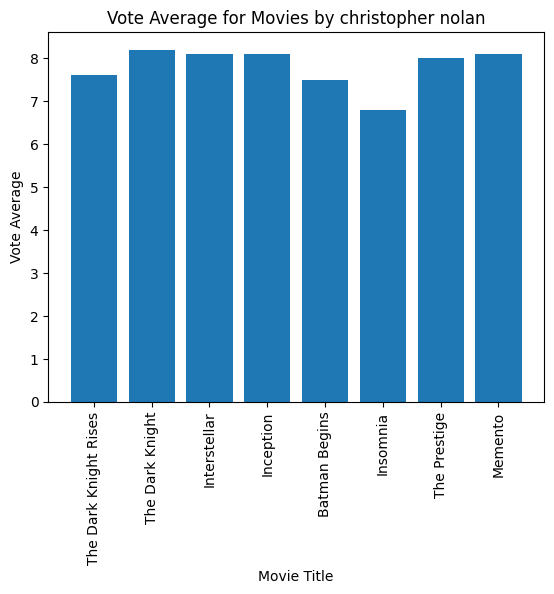

In [23]:

import matplotlib.pyplot as plt

director_name = input('Enter the director name: ')

# filter the movies_data DataFrame
movies_by_director = movies_data[movies_data['director'].str.contains(director_name, case=False)]

# check if the 'vote_average' column exists in the original DataFrame
if 'vote_average' in movies_data.columns:
    # create the bar chart
    plt.bar(movies_by_director['title'], movies_by_director['vote_average'])
    plt.xlabel("Movie Title")
    plt.ylabel("Vote Average")
    plt.title("Vote Average for Movies by " + director_name)
    plt.xticks(rotation=90)
    plt.show()
else:
    print("'vote_average' column not found in the original DataFrame.")

In [28]:
genre = input('Enter the genre: ')

# filter the movies_data DataFrame
movies_by_genre = movies_data[movies_data['genres'].str.contains(genre, case=False)]

# check if the 'vote_average' column exists in the original DataFrame
if 'vote_average' in movies_data.columns:
    #include the 'vote_average' column in the filtered DataFrame
    movies_by_genre = movies_by_genre[['title', 'genres', 'vote_average']]
    # sort the filtered DataFrame by vote_average in descending order
    movies_by_genre.sort_values(by='vote_average',ascending=False,inplace=True)
    #get top 10 movies
    top_10_movies = movies_by_genre.head(10)
else:
    print("'vote_average' column not found in the original DataFrame.")

print(top_10_movies)

Enter the genre: romance
                                      title                         genres  \
4247                  Me You and Five Bucks           Romance Comedy Drama   
2796                  The Prisoner of Zenda        Adventure Drama Romance   
809                            Forrest Gump           Comedy Drama Romance   
3041                             Love Jones           Comedy Drama Romance   
3906                          The Apartment           Comedy Drama Romance   
3984                       Some Like It Hot                 Comedy Romance   
3875                Dreaming of Joseph Lees                  Romance Drama   
463                                 Déjà Vu                  Romance Drama   
4329                             Casablanca                  Drama Romance   
2152  Eternal Sunshine of the Spotless Mind  Science Fiction Drama Romance   

      vote_average  
4247          10.0  
2796           8.4  
809            8.2  
3041           8.1  
3906       

In [31]:
def highest_rated_movie_by_actor(actor_name: str, movies_data: pd.DataFrame,n=10):
    # filter the movies_data DataFrame
    movies_by_actor = movies_data[movies_data['cast'].str.contains(actor_name, case=False)]

    # check if the 'vote_average' column exists in the original DataFrame
    if 'vote_average' in movies_data.columns:
        # include the 'vote_average' column in the filtered DataFrame
        movies_by_actor = movies_by_actor[['title', 'cast', 'vote_average']]
        # sort the filtered DataFrame by vote_average in descending order
        movies_by_actor.sort_values(by='vote_average',ascending=False,inplace=True)
        highest_rated_movie = movies_by_actor.head(10)
        return highest_rated_movie
    else:
        print("'vote_average' column not found in the original DataFrame.")

# test the function
actor_name = input('Enter the actor name: ')
print(highest_rated_movie_by_actor(actor_name, movies_data))

Enter the actor name: leonardo dicaprio
                            title  \
96                      Inception   
298       The Wolf of Wall Street   
351                  The Departed   
439                Shutter Island   
287              Django Unchained   
883           Catch Me If You Can   
2946  What's Eating Gilbert Grape   
25                        Titanic   
49               The Great Gatsby   
176                  The Revenant   

                                                   cast  vote_average  
96    Leonardo DiCaprio Joseph Gordon-Levitt Ellen P...           8.1  
298   Leonardo DiCaprio Jonah Hill Margot Robbie Kyl...           7.9  
351   Leonardo DiCaprio Matt Damon Jack Nicholson Ma...           7.9  
439   Leonardo DiCaprio Mark Ruffalo Ben Kingsley Em...           7.8  
287   Jamie Foxx Christoph Waltz Leonardo DiCaprio K...           7.8  
883   Leonardo DiCaprio Tom Hanks Christopher Walken...           7.7  
2946  Johnny Depp Leonardo DiCaprio Juliette Lew

Enter the genre name: action


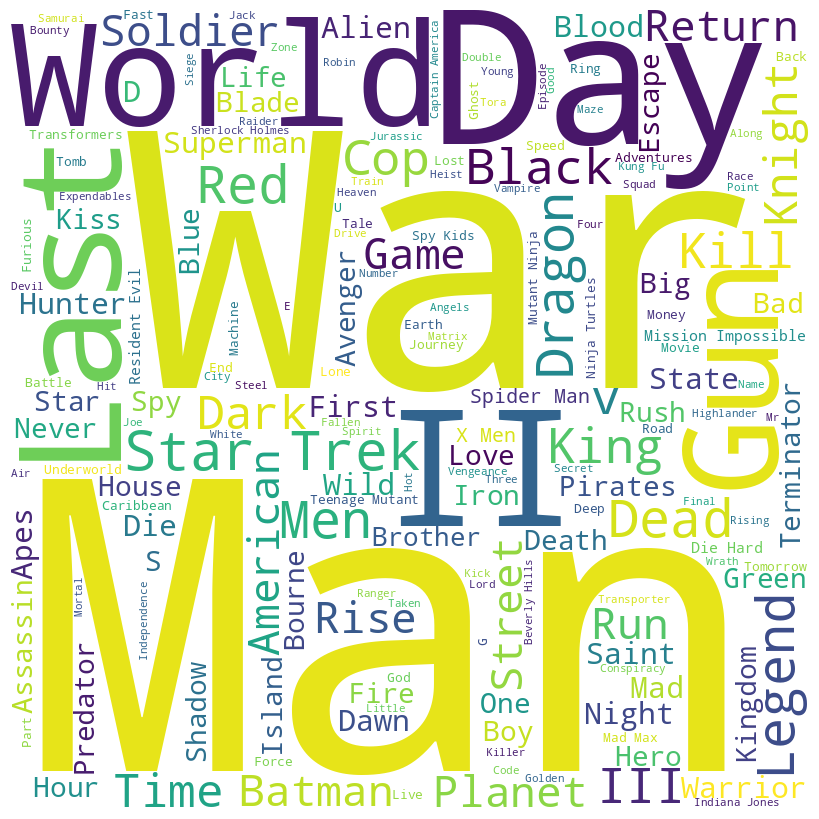

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

genre_name = input('Enter the genre name: ')

# filter the movies_data DataFrame for the genre
genre_movies = movies_data[movies_data['genres'].str.contains(genre_name, case=False)]

# create a string of all the titles of genre_movies
titles = ' '.join(genre_movies['title'].values.astype(str))

# create a wordcloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(titles)

# plot the wordcloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()